# Pandas, indexing and other advanced data manipulation features

The past few tutorials were focussed on `Pandas`. We met some of the basic data structures in pandas.

Basic pandas objects:

* Index
* Series
* Data Frame

We also learned how these three things are related. Namely, we can think of a pandas `DataFrame` as being composed of several *named columns*, each of which is like a `Series`, and a special `Index` column along the left-hand side.

This tutorial focuses on more advanced `pandas` options to accessing, addressing (indexing) and manipulating data.

### Learning goals:

* advanced pandas objects methods – the "verbs" that make them do useful things
* indexing and accessing row/column subsets fo data
* grouped data: aggregation and pivot tables

## Make a data frame to play with

To get started this time instead of loading data from file, we will build a little data frame and take look at it to remind ourselves of this structure. We'll build a data frame similar to a data set mentioned in a previosu tutorial.

First, import `pandas` because of course, and `numpy` in order to simulate some data.

In [1]:
import pandas as pd    
import numpy as np     # to make the simulated data

Now we can make the data frame. It will have 4 variables of cardiovascular data for a number of patients (the number of patiencts can be specified):

  * systolic blood pressure
  * diastolic blood pressure
  * blood oxygenation
  * pulse rate

Given that Pandas `DataFrame`s have a special `index` column, we'll just use the `index` as "patient ID" instead of making a fifth variable dedicated to it.

In [3]:
num_patients = 10    # specify the number of patients

We will use `Numpy` to simulate data by choosing a mean for each variable and a standard deviation. More specifically, the systolic blood pressure will have a mean of `125` and a standard deviation of `5`. The diastolic pressure will have a lower mean (`80`) but the same standard deviation, the blood oxygenation will have a mean of `98.5` and a smaller standard deviation of `0.3`. Finally, the pulse rate will have a mean of `65` abd a standard deviation of `2`.

In [4]:
sys_bp = np.int64(125  + 5*np.random.randn(num_patients,))
dia_bp = np.int64(80   + 5*np.random.randn(num_patients,))
b_oxy  = np.round(98.5 + 0.3*np.random.randn(num_patients,), 2)
pulse  = np.int64(65   + 2*np.random.randn(num_patients,))

We will build the data frame using a dictionary:

In [5]:
# Make a dictionary with a "key" for each variable name, and 
# the "values" being the num_patients long data vectors
df_dict = {'systolic BP' : sys_bp,
           'diastolic BP' : dia_bp,
           'blood oxygenation' : b_oxy,
           'pulse rate' : pulse
           }
    
our_df = pd.DataFrame(df_dict)    # Now make a data frame out of the dictionary

And now lets look at it.

In [7]:
our_df

systolic BP  diastolic BP  blood oxygenation  pulse rate
0          123            84              98.51          60
1          115            76              98.56          60
2          117            90              98.45          65
3          124            78              98.70          64
4          124            75              98.53          65
5          118            74              98.78          64
6          125            76              98.00          65
7          117            73              98.53          65
8          129            76              98.89          66
9          126            77              97.87          67

$\color{blue}{\text{Complete the following exercise.}}$

  - Use the cell below to create a dataframe with the following data:
       - 16 patients
       - systolic blood pressure 10% higher than the current
       - diastolic blood pressure 5% lower
       - blood oxygenation 2% higher
       - a 4% higher pulse rate

In [8]:
num_of_patients = 16

sys_bp2 = np.round(137.5  + 5*np.random.randn(num_of_patients,))
dia_bp2 = np.int64(76   + 5*np.random.randn(num_of_patients,))
b_oxy2  = np.round(100.47 + 0.3*np.random.randn(num_of_patients,), 2)
pulse2  = np.int64(67.6   + 2*np.random.randn(num_of_patients,))

df_dict2 = {'systolic BP' : sys_bp2,
           'diastolic BP' : dia_bp2,
           'blood oxygenation' : b_oxy2,
           'pulse rate' : pulse2}

our_df2 = pd.DataFrame(df_dict2)
our_df2

systolic BP  diastolic BP  blood oxygenation  pulse rate
0         139.0            81             100.75          66
1         130.0            74             100.80          66
2         150.0            76             100.36          66
3         139.0            78             100.66          67
4         138.0            79             100.47          66
5         143.0            73              99.96          66
6         144.0            74             100.37          63
7         141.0            72             100.40          68
8         134.0            70             100.58          67
9         135.0            83             100.15          68
10        144.0            69             100.43          65
11        133.0            79             100.43          69
12        134.0            76             100.26          69
13        147.0            66             100.55          66
14        134.0            75             100.61          66
15        134.0            77             100.38          67

Now we can see the nice structure of the `DataFrame` object. We have four columns corresponding to our measurement variables, and each row is an "observation" which, in the case, corresponds to an individual patient.

To appreciate some of the features of a pandas `DataFrame`, let's compare it with a numpy `Array` holding the same information. (Which we can do because we're only dealing with numbers here - one of the main features of a pandas data frame is that it can hold non-numeric information too).

In [9]:
our_array = np.transpose(np.vstack((sys_bp, dia_bp, b_oxy, pulse)))
our_array

array([[123.  ,  84.  ,  98.51,  60.  ],
       [115.  ,  76.  ,  98.56,  60.  ],
       [117.  ,  90.  ,  98.45,  65.  ],
       [124.  ,  78.  ,  98.7 ,  64.  ],
       [124.  ,  75.  ,  98.53,  65.  ],
       [118.  ,  74.  ,  98.78,  64.  ],
       [125.  ,  76.  ,  98.  ,  65.  ],
       [117.  ,  73.  ,  98.53,  65.  ],
       [129.  ,  76.  ,  98.89,  66.  ],
       [126.  ,  77.  ,  97.87,  67.  ]])

$\color{blue}{\text{Complete the following exercise.}}$

  - Explore what `.vstack` does, use the `markdown` cell below to explain what it does in your own words  

.vstack takes a sequence of arrays and stacks them vertically (in a row).

  - Use the following code cell to show a few examples where you create a numpy array and use vstack to change it, explain why you use chose those operations as examples

We can see here that our array, `our_array`, contains exactly the same information as our dataframe, `our_df`. There are 3 main differences between the two:

* they have different verbs – things they know how to do 
* we have more ways to access the information in a data frame
* the data frame could contain non-numeric information (e.g. gender) if we wanted

(Also notice that the data frame is just prettier when printed than the numpy array)

## Verbs

Let's look at some verbs. Intuitively, it seems like both variables should *know* how to take a mean. Let's see.

In [10]:
our_array.mean()

90.5705

So the numpy array does indeed know how to take the mean of itself, but it takes the mean of the entire array by default, which is not very useful in this case. If we want the mean of each variable, we have to specify that we want the means of the columns (i.e. row-wise means).

In [11]:
our_array.mean(axis=0)

array([121.8  ,  77.9  ,  98.482,  64.1  ])

But look what happens if we ask for the mean of our data frame:

In [12]:
our_df.mean()

systolic BP          121.800
diastolic BP          77.900
blood oxygenation     98.482
pulse rate            64.100
dtype: float64

Visually, that is much more organized! We have the mean of each of our variables, nicely labled by the variable name.

Data frames can also `describe()` themselves.

In [13]:
our_df.describe()

systolic BP  diastolic BP  blood oxygenation  pulse rate
count    10.000000     10.000000          10.000000   10.000000
mean    121.800000     77.900000          98.482000   64.100000
std       4.685676      5.195083           0.320097    2.330951
min     115.000000     73.000000          97.870000   60.000000
25%     117.250000     75.250000          98.465000   64.000000
50%     123.500000     76.000000          98.530000   65.000000
75%     124.750000     77.750000          98.665000   65.000000
max     129.000000     90.000000          98.890000   67.000000

Gives us a nice summary table of the data in our data frame.

Numpy arrays don't know how to do this.

In [29]:
our_array.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

Data frames can also make histograms and boxplots of themselves. They aren't publication quality, but super useful for getting a feel for our data.

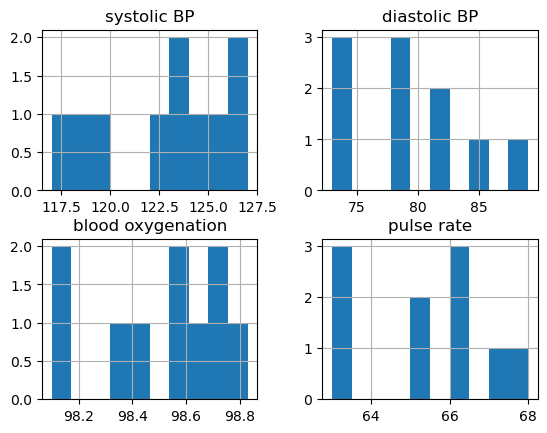

In [30]:
our_df.hist();

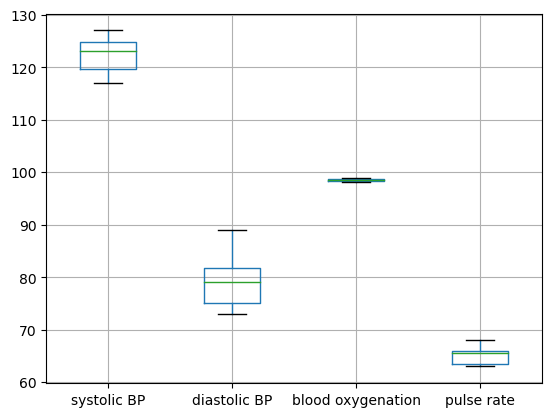

In [31]:
our_df.boxplot();

For a complete listing of what our data frame knows how to do, we can type `our_df.` and then hit the tab key.

In [48]:
our_df.

SyntaxError: invalid syntax (1899272014.py, line 1)

$\color{blue}{\text{Complete the following exercise.}}$

  - Use the next cell to report and describe two methods of `our_df`, explain why you chose those two.

.nunique() seems to show how many unique values there are in each column
.unstack() makes all the values into a single column, and they are still indexed and stacked by the column name.

Let's return to the `mean()` function, and see what, exactly, it is returning. We can do this by assigning the output to a variable and looking at its type.

In [49]:
our_means = our_df.mean()
our_means

systolic BP          122.400
diastolic BP          79.300
blood oxygenation     98.508
pulse rate            65.200
dtype: float64

In [50]:
type(our_means)

pandas.core.series.Series

So it is a pandas series, but, rather than the index being 0, 1, 2, 3, the *index values are actually the names of our variables*. 

If we want the mean pulse rate, *we can actually ask for it by name!*

In [51]:
our_means['pulse rate']

65.2

This introduces another key feature of pandas: **you can access data by name**.

$\color{blue}{\text{Complete the following exercise.}}$

  - Use the cell below to return the diastolic blood pressure from `our_means`

In [52]:
our_means['diastolic BP']

79.3

## Accessing data

Accessing data by name is kind of a big deal. It makes code more readable and faster and easier to write.

So, for example, let's say we wanted the mean pulse rate for our patients. Using numpy, we would have to remember or figure our which column of our numpy array was pulse rate. And we'd have to remember that Python indexes start at 0. *And* we'd have to remember that we have to tell numpy to take the mean down the columns explicitly. Ha. 

So our code might look something like...

In [53]:
np_style_means = our_array.mean(axis = 0)
pulse_mean = np_style_means[3]
pulse_mean

65.2

Compare that to doing it the pandas way:

In [54]:
our_means = our_df.mean()
our_means['pulse rate']

65.2

The pandas way makes it very clear what we are doing! People like things to have names and, in pandas, things have names.

$\color{blue}{\text{Complete the following exercise.}}$

  - Use the cell below to compute the mean of the `diastolic pressure` both using the `numpy` method and the `pandas` method:

In [55]:
#using numpy
numpy_mean = our_array.mean(axis = 0) #take the means down the column
dbp_mean = numpy_mean[1]
dbp_mean

79.3

In [56]:
#using pandas
dbp_mean = our_df.mean()
dbp_mean['diastolic BP']

79.3

### Accessing data using square brackets

Let's look ot our litte data frame again.

In [14]:
our_df

systolic BP  diastolic BP  blood oxygenation  pulse rate
0          123            84              98.51          60
1          115            76              98.56          60
2          117            90              98.45          65
3          124            78              98.70          64
4          124            75              98.53          65
5          118            74              98.78          64
6          125            76              98.00          65
7          117            73              98.53          65
8          129            76              98.89          66
9          126            77              97.87          67

We can grab a column (variable) by name if we want:

In [15]:
our_df['pulse rate']

0    60
1    60
2    65
3    64
4    65
5    64
6    65
7    65
8    66
9    67
Name: pulse rate, dtype: int64

Doing this creates another `DataFrame` (or `Series`), so it knows how to do stuff to. This allows us to do things like, for example, compute the mean pulse rate in one step instead of two. Like this:

In [59]:
our_df['pulse rate'].mean()   # creates a series, then makes it compute its own mean

65.2

We can grab as many columns as we want by using a list of column names.

In [60]:
needed_cols = ['diastolic BP', 'systolic BP']   # make a list
our_df[needed_cols]                             # use the list to grab columns

diastolic BP  systolic BP
0            89          125
1            85          126
2            79          127
3            73          117
4            81          118
5            82          119
6            74          124
7            79          122
8            73          123
9            78          123

We could also do this in one step.

In [61]:
our_df[['diastolic BP', 'systolic BP']]  # the inner brackets define our list

diastolic BP  systolic BP
0            89          125
1            85          126
2            79          127
3            73          117
4            81          118
5            82          119
6            74          124
7            79          122
8            73          123
9            78          123

 (although the double brackets might look a little confusing at first)

$\color{blue}{\text{Complete the following exercise.}}$

  - Use the cell below to extract blood oxygenation and pulse rate using a single line of code

In [62]:
our_df[['blood oxygenation', 'pulse rate']]

blood oxygenation  pulse rate
0              98.61          63
1              98.83          65
2              98.59          66
3              98.43          65
4              98.10          63
5              98.10          66
6              98.72          67
7              98.69          68
8              98.68          63
9              98.33          66

### Getting row and row/column combinations of data: "indexing"

**Terminology Warning!** "Indexing" is a general term which means "accessing data by location". In pandas, as we have seen, objects like DataFrames also have an "index" which is a special column of row identifiers. So, in pandas, we can index data using column names, row names (indexing using the index), or both. (We can also index into pandas data frames as if they were numpy arrays, which sometimes comes in handy.)

#### Changing the index to make (row) indexing more intuitive

Speaking of indexes, it's a little weird to have our patient IDs start at "0". Both because "patient zero" has a special meaning and also because it's just not intuitive to number a sequence of actual things starting at "0".

Fortunately, pandas `DataFrame` (and `Series`) objects allow you to customize their index column fairly easily.

Let's set the index to start at 1 rather than 0:

In [73]:
my_ind = np.linspace(1, 10, 10)  # make a sequence from 1 to 10
my_ind = np.int64(my_ind)        # change it from decimal to integer (not really necessary, but...)

Let's take a look at this index:

In [74]:
print(my_ind)

[ 1  2  3  4  5  6  7  8  9 10]


In [75]:
our_df.index = my_ind

In [76]:
our_df

systolic BP  diastolic BP  blood oxygenation  pulse rate
1           125            89              98.61          63
2           126            85              98.83          65
3           127            79              98.59          66
4           117            73              98.43          65
5           118            81              98.10          63
6           119            82              98.10          66
7           124            74              98.72          67
8           122            79              98.69          68
9           123            73              98.68          63
10          123            78              98.33          66

$\color{blue}{\text{Complete the following exercise.}}$

  - Use the next cell to create a new index variable using numpy the variable should start at 5 and cintinue to 15 with 10 steps in between 

In [71]:
new_ind = np.linspace(5, 15, 10)
new_ind = np.int64(new_ind)
our_df.index = new_ind
our_df

systolic BP  diastolic BP  blood oxygenation  pulse rate
5           125            89              98.61          63
6           126            85              98.83          65
7           127            79              98.59          66
8           117            73              98.43          65
9           118            81              98.10          63
10          119            82              98.10          66
11          124            74              98.72          67
12          122            79              98.69          68
13          123            73              98.68          63
15          123            78              98.33          66

### Accessing data using `pd.DataFrame.loc[]`

In the section above, we saw that you can get columns of data our of a data frame using square brackets `[]`. Pandas data frames also know how to give you subsets of rows or row/column combinations.  

The primary method for accessing specific bits of data from a pandas data frame is with the `loc[]` verb. It provides an easy way to get rows of data based upon the index column. In other words, `loc[]` is the way we use the data frame index as an index!

So this will give us the data for patient number 3:

In [77]:
our_df.loc[3]

systolic BP          127.00
diastolic BP          79.00
blood oxygenation     98.59
pulse rate            66.00
Name: 3, dtype: float64

**Note!** The above call did **not** behave like a Python or numpy index! If it had, we would have gotten the data for patient number 4 because Python and numpy use *zero based indexing*. 

But using the `loc[]` function gives us back the row "named" 3. We literally get what we asked for! Yay!

We can also *slice* out rows in chunks:

In [78]:
our_df.loc[3:6]

systolic BP  diastolic BP  blood oxygenation  pulse rate
3          127            79              98.59          66
4          117            73              98.43          65
5          118            81              98.10          63
6          119            82              98.10          66

Which, again, gives us what we asked for without having to worry about the zero-based business.

But `.loc[]` also allows us to get specfic columns too. Like:

In [82]:
our_df.loc[3:6, 'blood oxygenation']

3    98.59
4    98.43
5    98.10
6    98.10
Name: blood oxygenation, dtype: float64

For a single column, or:

In [80]:
our_df.loc[3:6,'systolic BP':'blood oxygenation']

systolic BP  diastolic BP  blood oxygenation
3          127            79              98.59
4          117            73              98.43
5          118            81              98.10
6          119            82              98.10

for multiple columns.

In summary, there are 3 main ways to get chunks of data out of a data frame "by name".

* square brackets (only) gives us columns, e.g. `our_df['systolic BP']`
* `loc[]` with one argument gives us rows, e.g. `our_df.loc[3]`
* `loc[]` with two arguments gives us row-column combinations, e.g. `our_df.loc[3,'systolic BP']`

Additionally, with `loc[]`, we can specify index ranges for the rows or columns or both, e.g. `new_df.loc[3:6,'systolic BP':'blood oxygenation']`

One final thing about using `loc[]` is that the index column in a `DataFrame` doesn't have to be numbers. It can be date/time strings (as we'll see later on), or just plain strings (as we've seen above with `Series` objects).

$\color{blue}{\text{Complete the following exercise.}}$

  - Use the next cell to create a data frame of heart measurements where the index is the name of the patients (name and surname, make them up!):

In [88]:
hrt_data = [90, 60,70, 87, 59, 69]
hrt_dict = {'Heart Rate': hrt_data}
hrt_df = pd.DataFrame(hrt_dict, index = ['Person1','Person2', 'Person3','Person4', 'Person5', 'Person6'])
hrt_df

Heart Rate
Person1          90
Person2          60
Person3          70
Person4          87
Person5          59
Person6          69

Let's look at a summary of our data using the `describe()` method:

In [89]:
our_sum = our_df.describe()
our_sum

systolic BP  diastolic BP  blood oxygenation  pulse rate
count    10.000000     10.000000          10.000000    10.00000
mean    122.400000     79.300000          98.508000    65.20000
std       3.405877      5.229192           0.258018     1.75119
min     117.000000     73.000000          98.100000    63.00000
25%     119.750000     75.000000          98.355000    63.50000
50%     123.000000     79.000000          98.600000    65.50000
75%     124.750000     81.750000          98.687500    66.00000
max     127.000000     89.000000          98.830000    68.00000

This looks suspiciously like a data frame except the index column looks like they're... er... not indexes. Let's see.

In [90]:
type(our_sum)

pandas.core.frame.DataFrame

Yep, it's a data frame! But let's see if that index column actually works:

In [91]:
our_sum.loc['mean']

systolic BP          122.400
diastolic BP          79.300
blood oxygenation     98.508
pulse rate            65.200
Name: mean, dtype: float64

Note that, with a `Series` object, we use square brackets (only) to get  rows. With a `DataFrame`, square brackets (only) are used to get columns. It won't work for `DataFrame` objects:

In [92]:
our_sum['mean']

KeyError: 'mean'

So, with a `DataFrame`, we have to use `.loc[]` to get rows.

And now we can slice out (get a range of) rows:

In [93]:
our_sum.loc['count':'std']

systolic BP  diastolic BP  blood oxygenation  pulse rate
count    10.000000     10.000000          10.000000    10.00000
mean    122.400000     79.300000          98.508000    65.20000
std       3.405877      5.229192           0.258018     1.75119

Or rows and columns:

In [94]:
our_sum.loc['count':'std', 'systolic BP':'diastolic BP']

systolic BP  diastolic BP
count    10.000000     10.000000
mean    122.400000     79.300000
std       3.405877      5.229192

### Accessing data using pd.DataFrame.iloc[]

Occasionally, you might want to treat a pandas `DataFrame` as a numpy `Array` and index into it using the *implicit* row and column indexes (which start as zero of course). So support this, pandas `DataFrame` objects also have an `iloc[]`.

Let's look at our data frame again:

In [95]:
our_df

systolic BP  diastolic BP  blood oxygenation  pulse rate
1           125            89              98.61          63
2           126            85              98.83          65
3           127            79              98.59          66
4           117            73              98.43          65
5           118            81              98.10          63
6           119            82              98.10          66
7           124            74              98.72          67
8           122            79              98.69          68
9           123            73              98.68          63
10          123            78              98.33          66

And let's check its shape:

In [96]:
our_df.shape

(10, 4)

At some level, then, Python considers this to be just a 10x4 array (like a numpy array). This is were `iloc[]` comes in; `iloc[]` will treat the data frame as though it were a numpy array – no names!

So let's index into `our–df` using `iloc[]`:

In [97]:
our_df.iloc[3]  # get the fourth row

systolic BP          117.00
diastolic BP          73.00
blood oxygenation     98.43
pulse rate            65.00
Name: 4, dtype: float64

And compare that to using `loc[]`:

In [98]:
our_df.loc[3]

systolic BP          127.00
diastolic BP          79.00
blood oxygenation     98.59
pulse rate            66.00
Name: 3, dtype: float64

And of course you can slice out rows and columns:

In [99]:
our_df.iloc[2:5, 0:2]

systolic BP  diastolic BP
3          127            79
4          117            73
5          118            81

Indexing using `iloc[]` is rarely needed on regular data frames (if you're using it, you should probably be working with a numpy `Array`).

It is, however, very handy for pulling data out of summary data tables (see below).

## Non-numerical information (categories or factors)

One of the huge benefits of pandas objects is that, unlike numpy arrays, they can contain categorical variables.

### Make another data frame to play with

Let's use tools we've learned to make a data frame that has both numerical and categorical variables.

First, we'll make the numerical data:

In [16]:
num_patients = 20    # specify the number of patients

# make some simulated data with realistic numbers.
sys_bp = np.int64(125 + 5*np.random.randn(num_patients,))
dia_bp = np.int64(80 + 5*np.random.randn(num_patients,))
b_oxy = np.round(98.5 + 0.3*np.random.randn(num_patients,), 2)
pulse = np.int64(65 + 2*np.random.randn(num_patients,))


(Now we'll make them interesting – this will be clear later)

In [17]:
sys_bp[0:10] = sys_bp[0:10] + 15
dia_bp[0:10] = dia_bp[0:10] + 15
sys_bp[0:5] = sys_bp[0:5] + 5
dia_bp[0:5] = dia_bp[0:5] + 5
sys_bp[10:15] = sys_bp[10:15] + 5
dia_bp[10:15] = dia_bp[10:15] + 5

Now let's make a categorical variable indicating whether the patient is diabetic or not. We'll make the first half be diabetic.

In [18]:
diabetic = pd.Series(['yes', 'no'])  # make the short series
diabetic = diabetic.repeat(num_patients/2)       # repeat each over two cell's worth of data
diabetic = diabetic.reset_index(drop=True)      # reset the series's index value

In [19]:
print(diabetic)

0     yes
1     yes
2     yes
3     yes
4     yes
5     yes
6     yes
7     yes
8     yes
9     yes
10     no
11     no
12     no
13     no
14     no
15     no
16     no
17     no
18     no
19     no
dtype: object


Now will make an "inner" sex variable.

In [20]:
sex = pd.Series(['male', 'female'])             # make the short series

In [21]:
print(sex)

0      male
1    female
dtype: object


In [22]:
sex = sex.repeat(num_patients/4)                 # repeat each over one cell's worth of data

In [23]:
print(sex)

0      male
0      male
0      male
0      male
0      male
1    female
1    female
1    female
1    female
1    female
dtype: object


In [24]:
sex = pd.concat([sex]*2, ignore_index=True)   # stack or "concatenate" two copies

In [25]:
print(sex)

0       male
1       male
2       male
3       male
4       male
5     female
6     female
7     female
8     female
9     female
10      male
11      male
12      male
13      male
14      male
15    female
16    female
17    female
18    female
19    female
dtype: object


Now we'll make a dictionary containing all our data.

In [26]:
# Make a dictionary with a "key" for each variable name, and 
# the "values" being the num_patients long data vectors
df_dict = {'systolic BP' : sys_bp,
           'diastolic BP' : dia_bp,
           'blood oxygenation' : b_oxy,
           'pulse rate' : pulse,
           'sex': sex,
           'diabetes': diabetic
           }
    

And turn it into a data frame.

In [27]:
new_df = pd.DataFrame(df_dict)    # Now make a data frame out of the dictionary

Finally, let's up our game and make a more descriptive index column!

In [28]:
basename = 'patient '                      # make a "base" row name
my_index = []                             # make an empty list
for i in range(1, num_patients+1) :       # use a for loop to add
    my_index.append(basename + str(i))     # id numbers so the base name

Assign our new row names to the index of our data frame.

In [29]:
new_df.index = my_index

Let's look at our creation!

In [30]:
new_df

systolic BP  diastolic BP  blood oxygenation  pulse rate     sex  \
patient 1           150            94              98.58          64    male   
patient 2           146            98              98.66          64    male   
patient 3           140            92              99.10          64    male   
patient 4           143            99              98.19          67    male   
patient 5           147           104              98.80          66    male   
patient 6           148            90              97.96          66  female   
patient 7           140            92              98.51          62  female   
patient 8           141            93              98.31          68  female   
patient 9           146            95              98.45          62  female   
patient 10          144            84              98.60          63  female   
patient 11          127            89              98.83          66    male   
patient 12          133            81              98.32          68    male   
patient 13          131            75              98.07          65    male   
patient 14          134            80              98.74          66    male   
patient 15          138            88              98.43          64    male   
patient 16          125            81              98.16          67  female   
patient 17          131            96              98.61          65  female   
patient 18          132            86              98.25          66  female   
patient 19          124            78              97.68          66  female   
patient 20          123            89              98.30          66  female   

           diabetes  
patient 1       yes  
patient 2       yes  
patient 3       yes  
patient 4       yes  
patient 5       yes  
patient 6       yes  
patient 7       yes  
patient 8       yes  
patient 9       yes  
patient 10      yes  
patient 11       no  
patient 12       no  
patient 13       no  
patient 14       no  
patient 15       no  
patient 16       no  
patient 17       no  
patient 18       no  
patient 19       no  
patient 20       no

### Looking at our data

Another really nice thing about pandas `DataFrames` is that they naturally lend themselves to interrogation via our friend `Seaborn`. 

So let's peek at some stuff.

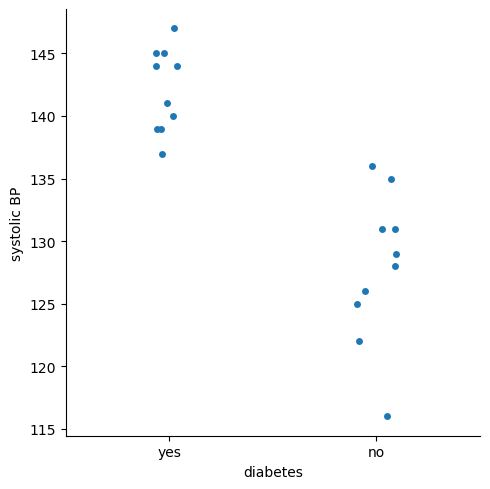

In [115]:
import seaborn as sns

sns.catplot(data=new_df, x='diabetes', y='systolic BP');

Okay, now let's go crazy and do a bunch of plots.

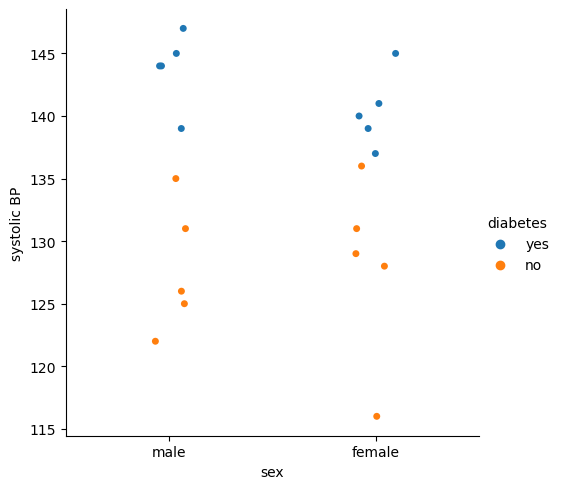

In [116]:
sns.catplot(data=new_df, x='sex', y='systolic BP', hue='diabetes');

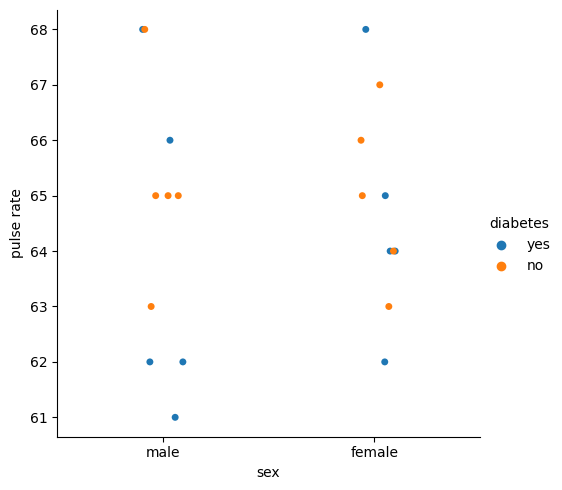

In [117]:
sns.catplot(data=new_df, x='sex', y='pulse rate', hue='diabetes');

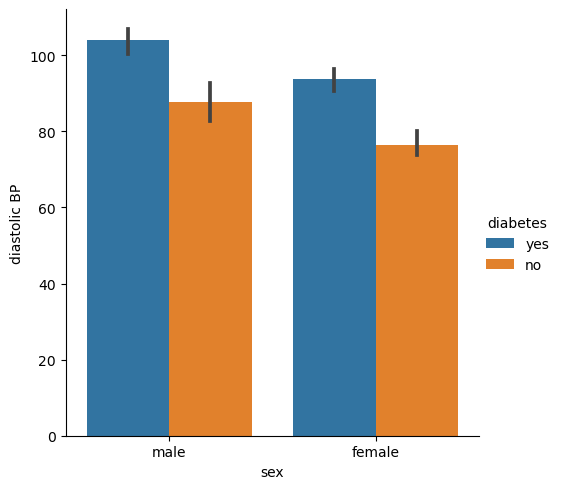

In [118]:
sns.catplot(data=new_df, x='sex', y='diastolic BP', hue='diabetes', kind='bar');

### Computing within groups

Now that we have an idea of what's going on, let's look at how we could go about computing things like the mean systolic blood pressure in females vs. males, etc.

#### Using the `groupby()` method

Data frames all have a `group_by()` method that, as the name implies, will group our data by a categorical variable. Let's try it.

In [119]:
new_df.groupby('sex')

So this gave us a `DataFrameGroupBy` object which, in and of itself, is not very useful. However, *it knows how to do things*!

In general, `GroupBy` objects know how to do pretty much anything that regular `DataFrame` objects do. So, if we want the mean by gender, we can ask the `GroupBy` (for short) object to give us the mean:

In [120]:
new_df.groupby('sex').mean(numeric_only = True)

systolic BP  diastolic BP  blood oxygenation  pulse rate
sex                                                             
female        134.2          85.1             98.464        64.8
male          135.8          95.8             98.471        64.5

#### Using the `groupby()` followed by `aggregate()`

More powerfully, we can use a `GroupBy` object's `aggregate()` method to compute many things at once.

In [121]:
new_df.groupby('diabetes').aggregate(['mean', 'std', 'min', 'max'])

/var/folders/hw/f3853qmd06lfc_ptggtfcswh0000gn/T/ipykernel_87967/2935691488.py:1: FutureWarning: ['sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  new_df.groupby('diabetes').aggregate(['mean', 'std', 'min', 'max'])


systolic BP                     diastolic BP                     \
                mean       std  min  max         mean       std min  max   
diabetes                                                                   
no             127.9  6.008328  116  136         82.0  7.916228  73   95   
yes            142.1  3.314949  137  147         98.9  6.573516  88  107   

         blood oxygenation                         pulse rate                \
                      mean       std    min    max       mean       std min   
diabetes                                                                      
no                  98.530  0.155278  98.33  98.86       65.1  1.595131  63   
yes                 98.405  0.305187  97.90  98.93       64.2  2.529822  61   

              
         max  
diabetes      
no        68  
yes       68

Okay, what's going on here? First, we got a lot of information out. Second, we got a warning because pandas couldn't compute the mean, etc., on the gender variable, which is perfectly reasonable of course.

We can handle this by using our skills to carve out a subset of our data frame – just the columns of interest – and then use `groupby()` and `aggregate()` on that.

In [31]:
temp_df = new_df[['systolic BP', 'diastolic BP', 'diabetes']]        # make a data frame with only the columns we want
our_summary = temp_df.groupby('diabetes').aggregate(['mean', 'std', 'min', 'max'])     # compute stuff on those columns
our_summary

systolic BP                     diastolic BP                   
                mean       std  min  max         mean       std min  max
diabetes                                                                
no             129.8  4.871687  123  138         84.3  6.360468  75   96
yes            144.5  3.472111  140  150         94.1  5.445691  84  104

Notice here that there are *groups of columns*. Like there are two "meta-columns", each with four data columns in them. This makes getting the actual values out of the table for further computation, etc., kind of a pain. It's called "multi-indexing" or "hierarchical indexing". It's a pain.

Here are a couple examples.

In [32]:
our_summary[("systolic BP", "mean")]

diabetes
no     129.8
yes    144.5
Name: (systolic BP, mean), dtype: float64

In [33]:
our_summary.loc[("no")]

systolic BP   mean    129.800000
              std       4.871687
              min     123.000000
              max     138.000000
diastolic BP  mean     84.300000
              std       6.360468
              min      75.000000
              max      96.000000
Name: no, dtype: float64

Of course, we could do the blood pressure variables separately and store them for later plotting, etc.

In [34]:
temp_df = new_df[['systolic BP', 'diabetes']]        # make a data frame with only the columns we want
our_summary = temp_df.groupby('diabetes').aggregate(['mean', 'std', 'min', 'max'])     # compute stuff on those columns
our_summary

systolic BP                    
                mean       std  min  max
diabetes                                
no             129.8  4.871687  123  138
yes            144.5  3.472111  140  150

But we still have a meta-column label!

Here's were `.iloc[]` comes to the rescue!

If we look at the shape of the summary:

In [35]:
our_summary.shape

(2, 4)

We see that, ultimately, the data is just a 2x4 table. So if we want, say, the standard deviation of non-diabetics, we can just do:

In [37]:
our_summary.iloc[0, 1]

4.871686908385357

And we get back a pure number.

We can also do things "backwards", that is, instead of subsetting the data and then doing a `groupby()`, we can do the `groupby()` and then index into it and compute what we want. For example, if we wanted the mean of systolic blood pressure grouped by whether patients had diabetes or not, we could go one of two ways.

We could subset and then group:

In [128]:
new_df[['systolic BP', 'diabetes']].groupby('diabetes').mean()

systolic BP
diabetes             
no              127.9
yes             142.1

Or we could group and then subset:

In [129]:
new_df.groupby('diabetes')[['systolic BP']].mean()

systolic BP
diabetes             
no              127.9
yes             142.1

Okay, first, it's cool that there are multiple ways to do things. Second – **aarrgghh!** – things are starting to get complicated and code is getting hard to read!

We can make our life a bit easier and make our code easier to read by leaning on the `.aggregate()` method more heavily:

In [38]:
new_df.groupby('diabetes').aggregate(Mean=('systolic BP',"mean"))

Mean
diabetes       
no        129.8
yes       144.5

The "Mean" is your new title, while inside the second set of parantheses is where/what you want the aggregate function to calculate

So now we can do: 

In [39]:
 new_df.groupby('diabetes').aggregate(Mean=('systolic BP',"mean"),
                                      Standard_Deviation = ('systolic BP',"std"))

Mean  Standard_Deviation
diabetes                           
no        129.8            4.871687
yes       144.5            3.472111

Or, for a shorter column name for the standard deviation:

In [40]:
new_df.groupby('diabetes').aggregate( Mean=('systolic BP',"mean"), STD = ('systolic BP',"std"))

Mean       STD
diabetes                 
no        129.8  4.871687
yes       144.5  3.472111

#### Using pivot tables

"Pivot tables" (so named because allow you to look at data along different dimensions or directions) provide a handy solution for summarizing data.

By default, pivot tables tabulate the mean of data. So if we wish to compute the average systolic blood pressure broken out by diabetes status, all we have to do is:

In [41]:
new_df.pivot_table('systolic BP', index='diabetes')

systolic BP
diabetes             
no              129.8
yes             144.5

Here, `index` is used in the "row names" sense of the word.

We can also have another grouping variables map to the columns of the output if we wish:

In [42]:
new_df.pivot_table('systolic BP', index='diabetes', columns='sex')

sex       female   male
diabetes               
no         127.0  132.6
yes        143.8  145.2

Finally, we can specify pretty much any other summary function we want to "aggregate" by:

In [43]:
new_df.pivot_table('systolic BP', index='diabetes', columns='sex', aggfunc='median')

sex       female  male
diabetes              
no           125   133
yes          144   146

## Summary

In this tutorial, we have covered some key aspects of working with data using pandas data frames. These were:

* doing things with data using the methods – the verbs – of pandas objects
* accessing subsets of the data with 
     - square brackets
     - the `.loc[]` method
     - the `.iloc[]` method
* assembling data frames and customizing the index
* grouping data and computing summaries using
     - `groupby()` and `aggregate()`
     - pivot tables

## $\color{blue}{\text{Complete the following exercise.}}$

1. Make a data frame that has
    * one categorical variable, "bilingual", that splits the data in half ("yes" and "no")
    * two numerical variables, verbal GRE and quant GRE 
    * (you can build in, or not, whatever effect of bilingual you wish)
    * (GRE scores have a mean of about 151 and a std. dev. of about 8.5)
2. Set the index to be "Student 1", "Student 2", etc.
3. Do a seaborn plot of verbal GRE vs. bilinguality (is that a word?)
4. Make another one of quant GRE vs. bilingual status
5. Compute the mean and standard *error* of each score separated by bilingual status (using any method you wish!)